In [2]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers.legacy import SGD, Adam, RMSprop

# importing of service libraries
import numpy as np
import matplotlib.pyplot as plt

print('Libraries imported.')

Libraries imported.


In [3]:
#training constants
BATCH_SIZE = 128
N_EPOCH = 20 # use 20 for best initial results
N_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

print('Main variables initialised.')

Main variables initialised.


In [4]:
# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

print('Image variables initialisation')

Image variables initialisation


In [5]:
#load dataset
(input_X_train, output_y_train), (input_X_test, output_y_test) = cifar10.load_data()
print('input_X_train shape:', input_X_train.shape)
print(input_X_train.shape[0], 'train samples')
print(input_X_test.shape[0], 'test samples')
 
# convert to categorical
output_Y_train = utils.to_categorical(output_y_train, N_CLASSES)
output_Y_test = utils.to_categorical(output_y_test, N_CLASSES) 

# float and normalization
input_X_train = input_X_train.astype('float32')
input_X_test = input_X_test.astype('float32')
input_X_train /= 255
input_X_test /= 255

input_X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [6]:
RESHAPED = 3072
N_EPOCH = 40
N_HIDDEN = 128

model = Sequential()
optimizer = SGD()

model.add(Flatten(input_shape=(32, 32, 3)))
# Hidden layer 1 with 128 hidden units and ReLu activation function
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
# Hidden layer 2 with 128 hidden units and ReLu activation function
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
# output layer with 100 units and softmax activation
model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 activation_1 (Activation)   (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
 activation_2 (Activation)   (None, 10)                0

In [7]:
history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=20, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/20
313/313 [==============================] - 4s 10ms/step - loss: 2.0724 - accuracy: 0.2545 - val_loss: 1.9438 - val_accuracy: 0.3167
Epoch 2/20
313/313 [==============================] - 3s 11ms/step - loss: 1.8856 - accuracy: 0.3335 - val_loss: 1.8825 - val_accuracy: 0.3370
Epoch 3/20
313/313 [==============================] - 3s 9ms/step - loss: 1.8136 - accuracy: 0.3623 - val_loss: 1.8174 - val_accuracy: 0.3641
Epoch 4/20
313/313 [==============================] - 2s 6ms/step - loss: 1.7664 - accuracy: 0.3789 - val_loss: 1.7932 - val_accuracy: 0.3706
Epoch 5/20
313/313 [==============================] - 2s 6ms/step - loss: 1.7244 - accuracy: 0.3947 - val_loss: 1.7954 - val_accuracy: 0.3604
Epoch 6/20
313/313 [==============================] - 2s 5ms/step - loss: 1.6942 - accuracy: 0.4057 - val_loss: 1.7241 - val_accuracy: 0.3908
Epoch 7/20
313/313 [==============================] - 2s 6ms/step - loss: 1.6667 - accuracy: 0.4144 - val_loss: 1.6974 - val_accuracy: 0.4064
Epoc

79/79 [==============================] - 0s 3ms/step - loss: 1.5308 - accuracy: 0.4526

Test score/loss: 1.530838131904602
Test accuracy: 0.45260000228881836
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


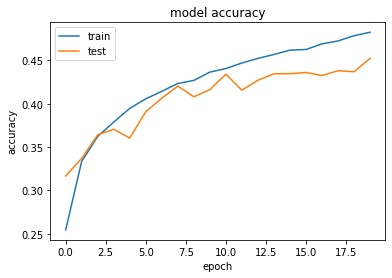

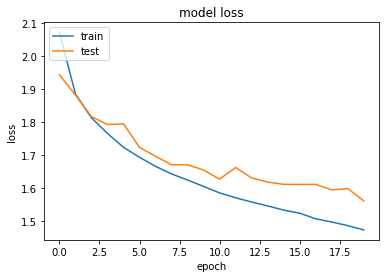

In [8]:
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model = Sequential()
optimizer = SGD()

model.add(Flatten(input_shape=(32, 32, 3)))
# Hidden layer 1 with 128 hidden units and ReLu activation function
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
# Hidden layer 2 with 128 hidden units and ReLu activation function
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
# output layer with 100 units and softmax activation
model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])#train the network
history = model.fit(input_X_train, output_Y_train, batch_size=32, epochs=20, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 128)               393344    
                                                                 
 activation_3 (Activation)   (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 activation_4 (Activation)   (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
 activation_5 (Activation)   (None, 10)               

In [6]:
N_EPOCH = 3

In [7]:
model = Sequential()
model.add(Conv2D(filters=6, strides=1, kernel_size=(5,5), padding='valid', activation='relu', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Dropout(0.25))
model.add(Conv2D(filters=16, strides=1, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [8]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

model2.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
model3.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
print(model.summary())
print(model1.summary())
print(model2.summary())
print(model3.summary())


In [9]:
# Sequential training of models
history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)



Epoch 1/3
313/313 [==============================] - 20s 61ms/step - loss: 1.9785 - accuracy: 0.2624 - val_loss: 1.7241 - val_accuracy: 0.3814
Epoch 2/3
313/313 [==============================] - 19s 61ms/step - loss: 1.7329 - accuracy: 0.3638 - val_loss: 1.6513 - val_accuracy: 0.3976
Epoch 3/3
313/313 [==============================] - 17s 53ms/step - loss: 1.6325 - accuracy: 0.4065 - val_loss: 1.6108 - val_accuracy: 0.4143


NameError: name 'model1' is not defined

In [11]:
model1 = Sequential()
model1.add(Conv2D(filters=6, strides=1, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model1.add(MaxPooling2D(pool_size=2, strides=2))
model1.add(Dropout(0.25))
model1.add(Conv2D(filters=16, strides=1, kernel_size=(3,3), padding='valid', activation='relu'))
model1.add(MaxPooling2D(pool_size=2, strides=2))
model1.add(Flatten())
model1.add(Dense(120, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(84, activation='relu'))
model1.add(Dense(10, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

In [ ]:
history1 = model1.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)



In [ ]:
# larger strides
model2 = Sequential()
model2.add(Conv2D(filters=6, strides=2, kernel_size=(5,5), padding='valid', activation='relu', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model2.add(MaxPooling2D(pool_size=2, strides=2))
model2.add(Dropout(0.25))
model2.add(Conv2D(filters=16, strides=2, kernel_size=(5,5), padding='valid', activation='relu'))
model2.add(MaxPooling2D(pool_size=2, strides=2))
model2.add(Flatten())
model2.add(Dense(120, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(84, activation='relu'))
model2.add(Dense(10, activation='softmax'))

In [ ]:
history2 = model2.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)


In [ ]:
# more filters
model3 = Sequential()
model3.add(Conv2D(filters=32, strides=1, kernel_size=(5,5), padding='valid', activation='relu', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model3.add(MaxPooling2D(pool_size=2, strides=2))
model3.add(Dropout(0.25))
model3.add(Conv2D(filters=48, strides=1, kernel_size=(5,5), padding='valid', activation='relu'))
model3.add(MaxPooling2D(pool_size=2, strides=2))
model3.add(Flatten())
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(84, activation='relu'))
model3.add(Dense(10, activation='softmax'))

In [ ]:
history3 = model3.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)

In [ ]:
# training/fitting of the DNN model
history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)
history1 = model1.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)
history2 = model2.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)
history3 = model3.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)

score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)


print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()